In [92]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt

In [93]:
#Loading the dataset
df = pd.read_csv(r"C:\Data Science Learning\Projects\Volatility Regime Detection in Stock Returns\data\03_Feature_Extraction\nifty_features.csv")

In [94]:
df.head()

,date,close,turnover,log_returns,abs_returns,vol_7,vol_14,vol_30,volumn_change
0,2014-02-12,6084.00,5351.08,0.003507,0.003507,0.002187,0.007891,0.007648,0.015616
1,2014-02-13,6001.10,5037.18,-0.013720,0.013720,0.006368,0.008009,0.007694,-0.058661
2,2014-02-14,6048.35,5539.70,0.007843,0.007843,0.006945,0.006616,0.007869,0.099762
3,2014-02-17,6073.30,4455.65,0.004117,0.004117,0.007051,0.006753,0.007908,-0.195687
4,2014-02-18,6127.10,4592.38,0.008819,0.008819,0.007594,0.007206,0.008052,0.030687


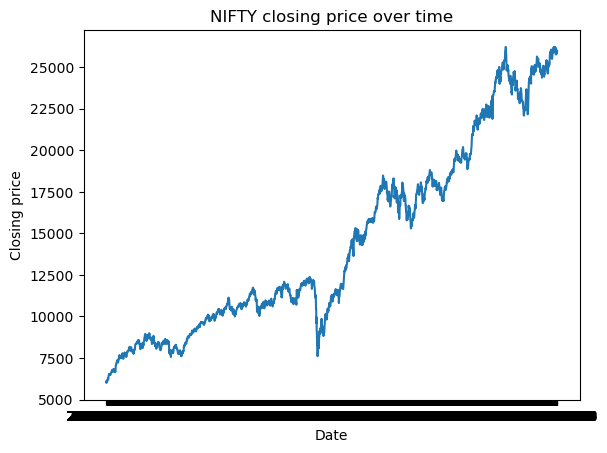

In [95]:
#Closing Price Trend
plt.plot(df["date"],df["close"])
plt.title("NIFTY closing price over time")
plt.xlabel("Date")
plt.ylabel("Closing price")
plt.show()

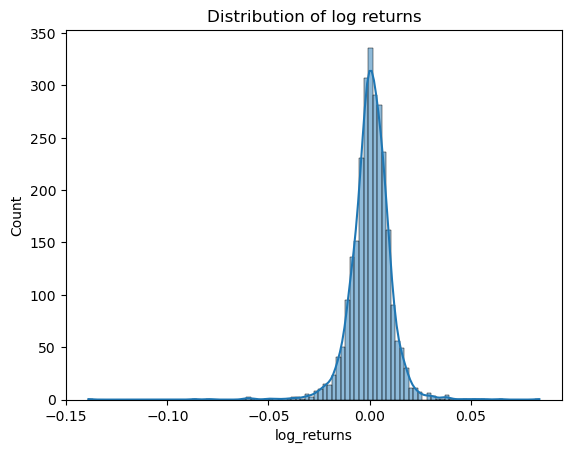

In [96]:
#Distribution of logs
sns.histplot(df["log_returns"],bins=100,kde=True)
plt.title("Distribution of log returns")
plt.show()

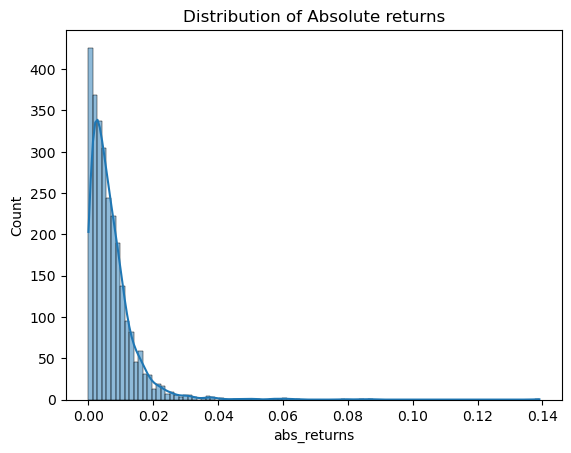

In [97]:
#Abolute Returns(Volatility Proxy)
sns.histplot(df["abs_returns"],bins=100,kde=True)
plt.title("Distribution of Absolute returns")
plt.show()

The distribution of absolute returns is heavily right-skewed with fat tails, indicating frequent small movements and rare but extreme price shocks. This confirms volatility clustering and motivates the use of regime-switching models

The heavy-tailed distribution of absolute returns confirms non-normality and the presence of distinct volatility regimes in the NIFTY index

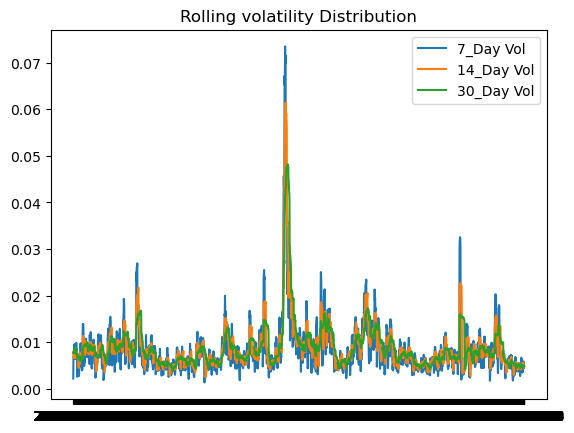

In [100]:
#Rolling Volitility Comparison
plt.plot(df["date"],df["vol_7"],label="7_Day Vol")
plt.plot(df["date"],df["vol_14"],label="14_Day Vol")
plt.plot(df["date"],df["vol_30"],label="30_Day Vol")

plt.legend()
plt.title("Rolling volatility Distribution")
plt.show()

Rolling volatility at multiple horizons shows clear clustering, persistence, and scale-dependent responses to market shocks. Short-term volatility reacts sharply, while long-term volatility captures regime persistence, confirming the presence of distinct volatility regimes.

The alignment and persistence of rolling volatility across multiple horizons indicate structural volatility regimes in the NIFTY index

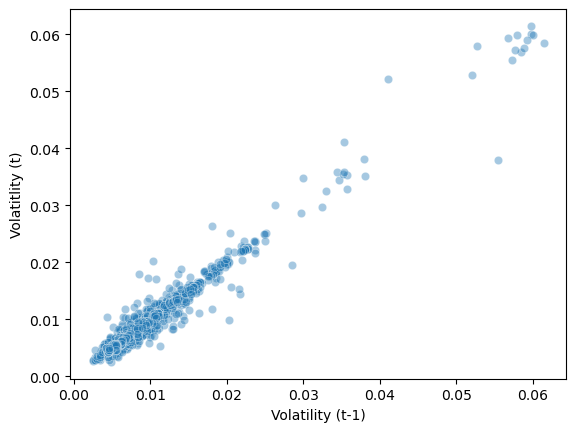

In [103]:
#Volatility Clustering
df["vol_lag1"] = df["vol_14"].shift(1)

sns.scatterplot(
    x=df["vol_lag1"],
    y=df["vol_14"],
    alpha=0.4
)

plt.xlabel("Volatility (t-1)")
plt.ylabel("Volatitlity (t)")
plt.show()

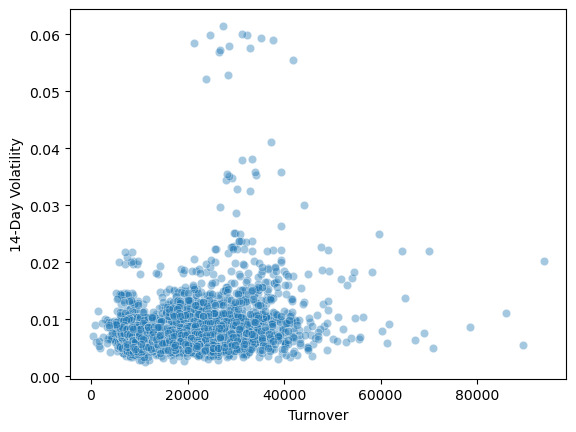

In [104]:
#Turnover vs Volatility
sns.scatterplot(
    x=df["turnover"],
    y=df["vol_14"],
    alpha=0.4
)
plt.xlabel("Turnover")
plt.ylabel("14-Day Volatility")
plt.show()

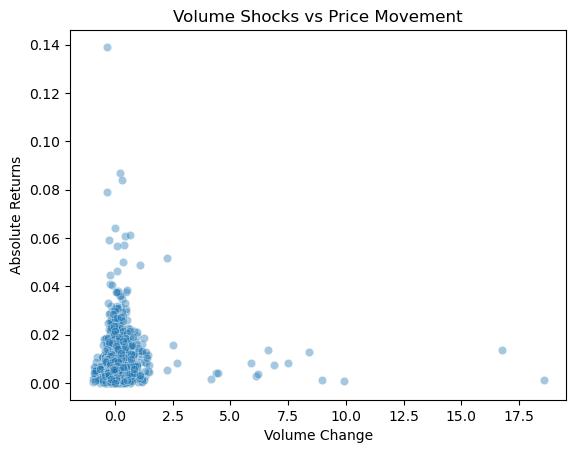

In [105]:
#Volume Change vs market Stress
sns.scatterplot(
    x=df["volumn_change"],
    y=df["abs_returns"],
    alpha=0.4
)
plt.xlabel("Volume Change")
plt.ylabel("Absolute Returns")
plt.title("Volume Shocks vs Price Movement")
plt.show()


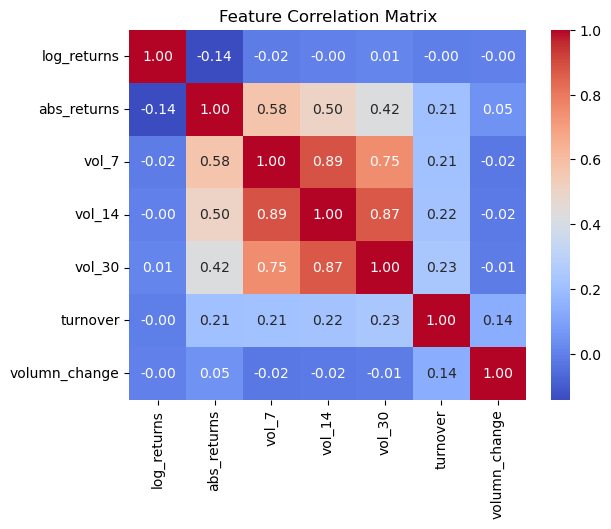

In [106]:
#Correlation heatmap

features = [
    "log_returns","abs_returns",
    "vol_7","vol_14","vol_30",
    "turnover","volumn_change"
]

sns.heatmap(
    df[features].corr(),
    cmap="coolwarm",
    annot=True,
    fmt=".2f"
)
plt.title("Feature Correlation Matrix")
plt.show()

In [107]:
#Interpretation:-
#1)Price direction is largely uncorrelated with volatility and volume.
#2)Large price movements directly increase rolling volatility.
#3)Volatility is persistent across time scales.
#4)Volume changes are noisy and short-lived.

In [108]:
#High Volatitlity Regim identification
threshold = df["vol_14"].quantile(0.90)
df["high_volatility"] = df["vol_14"] > threshold
df["high_volatility"].value_counts(normalize=True)


high_volatility
False    0.899814
True     0.100186
Name: proportion, dtype: float64

Only about 10% of trading days experience high volatility, while 90% of days are relatively calm.

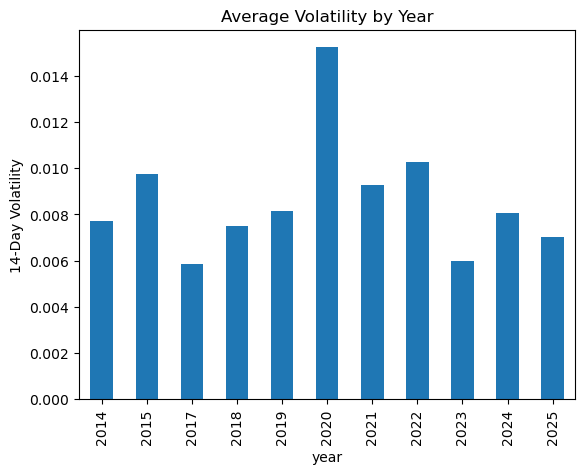

In [110]:
#DO volatility Regimes differ over the years?

df["date"] = pd.to_datetime(df["date"])
df["year"] = df["date"].dt.year

yearly_vol = df.groupby("year")["vol_14"].mean()

yearly_vol.plot(kind="bar")
plt.title("Average Volatility by Year")
plt.ylabel("14-Day Volatility")
plt.show()


In [129]:
df.groupby("high_volatility")[["abs_returns","turnover","vol_14"]].mean()

,abs_returns,turnover,vol_14
high_volatility,,,
False,0.006052,19762.061469,0.007409
True,0.014322,28385.549294,0.019757


In [ ]:
#Interpretation
#On high-volatility days, price movements are more than twice as large.
#Trading activity increases significantly during high-volatility periods.
#High-volatility regimes exhibit nearly 3× higher volatility.

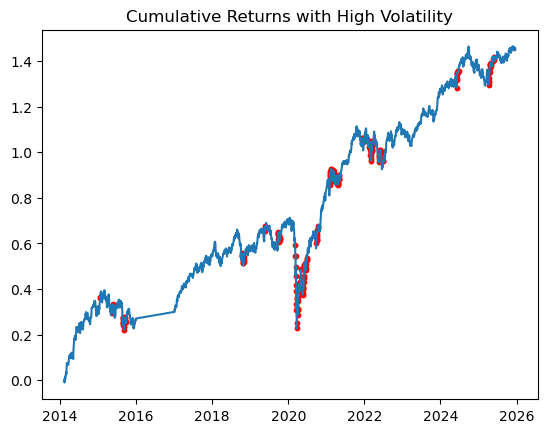

In [135]:
#DrawDown During high volatility 
df["cum_returns"] = df["log_returns"].cumsum()

plt.plot(df["date"],df["cum_returns"])
plt.scatter(
    df[df["high_volatility"]]["date"],
    df[df["high_volatility"]]["cum_returns"],
    color="red",
    s=10
)

plt.title("Cumulative Returns with High Volatility")
plt.show()

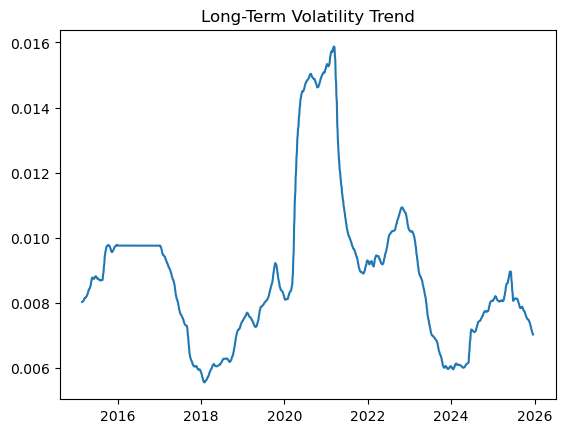

In [137]:
#Stability check
df["vol_trend"] = df["vol_14"].rolling(252).mean()

plt.plot(df["date"], df["vol_trend"])
plt.title("Long-Term Volatility Trend")
plt.show()


In [ ]:
#Volatility rises and falls over years
#This confirms heteroskedasticity in financial returns

In [ ]:
#The highest volatility occurs during this period
#Corresponds to major global uncertainty (COVID-19 period)

The long-term volatility trend reveals that market risk is not constant but evolves over time, with pronounced spikes during crisis periods and gradual mean reversion afterward. The presence of volatility clustering and regime shifts highlights the importance of modeling volatility dynamically rather than assuming constant variance.